In [1]:
from utils import data_utils
import matplotlib.pyplot as plt
import cv2
import pickle
import numpy as np

In [2]:
def label_parse(label, img, decoder):
    for x_cell in range(7):
        for y_cell in range(7):
            if label[x_cell][y_cell][4] != 0:
                box_info = label[x_cell][y_cell][:4]
                name = np.argmax(label[x_cell][y_cell][5:])
                center_x = (box_info[0] * 32) + (x_cell * 32)
                center_y = (box_info[1] * 32) + (y_cell * 32)
                
                w = box_info[2] * 224
                h = box_info[3] * 224
                
                c1 = (int(center_x - (w / 2)), int(center_y - (h / 2)))
                c2 = (int(center_x + (w / 2)), int(center_y + (h / 2)))
                
                img = cv2.rectangle(img, c1, c2, (255, 0, 0), 1)
                img = cv2.putText(img, decoder[name], (c1[0], c1[1] + 20), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1)
    return img

def get_decoder():
    with open('./dataset/encoder.pkl', 'rb') as f:
        encoder = pickle.load(f)
    decoder = dict([(value, key) for key, value in encoder.items()])
    return decoder

In [3]:
train_ds = data_utils.get_train_dataset()
val_ds = data_utils.get_val_dataset()
class_decoder = get_decoder()

In [4]:
for i in train_ds.take(8):
    sample = i
images = sample[0]
labels = sample[1]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


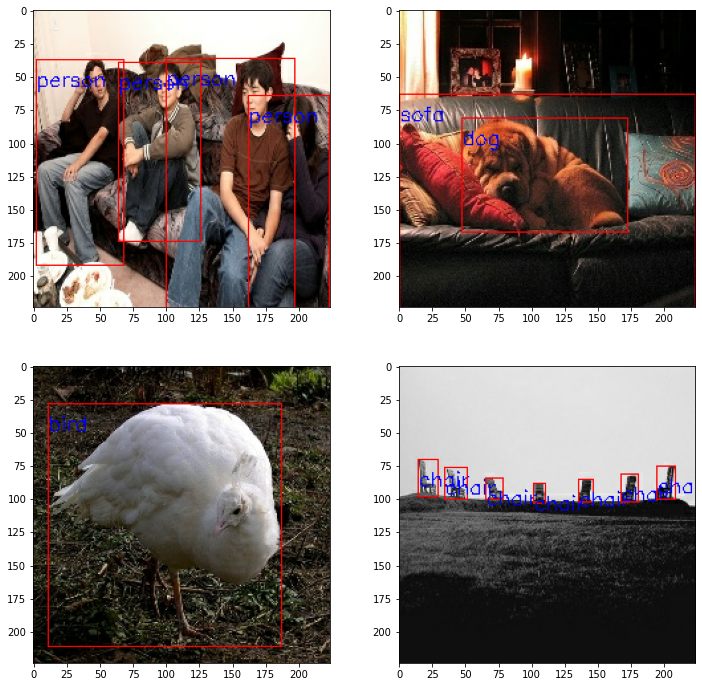

In [5]:
plt.figure(figsize=(12, 12))
for i in range(4):
    image = (images[i].numpy() + 1) / 2
    plt.subplot(2, 2, i + 1)
    image = label_parse(labels[i].numpy(), image, class_decoder)
    plt.imshow(image)

In [52]:
for i in val_ds.take(8):
    sample = i
images = sample[0]
labels = sample[1]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


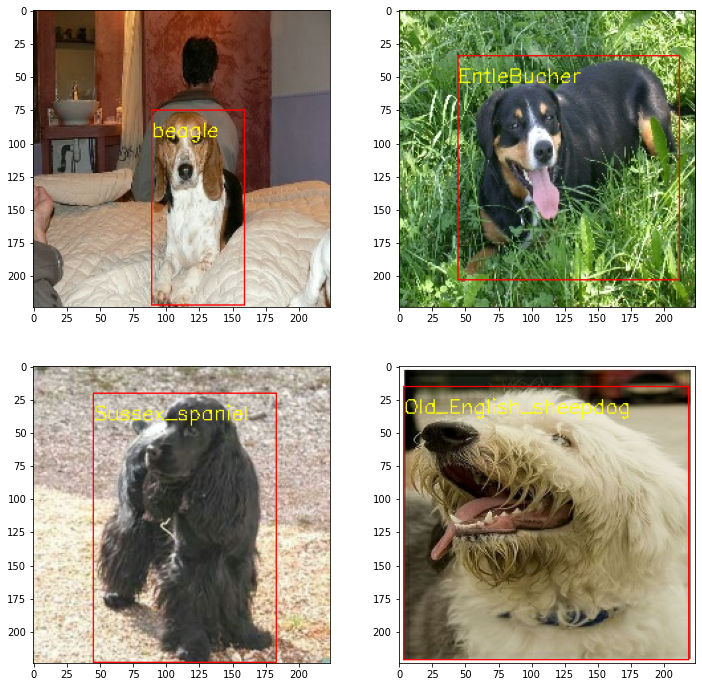

In [53]:
plt.figure(figsize=(12, 12))
for i in range(4):
    image = (images[i].numpy() + 1) / 2
    plt.subplot(2, 2, i + 1)
    image = label_parse(labels[i].numpy(), image, class_decoder)
    plt.imshow(image)

In [74]:
for i in test_ds.take(7):
    sample = i
images = sample[0]
labels = sample[1]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


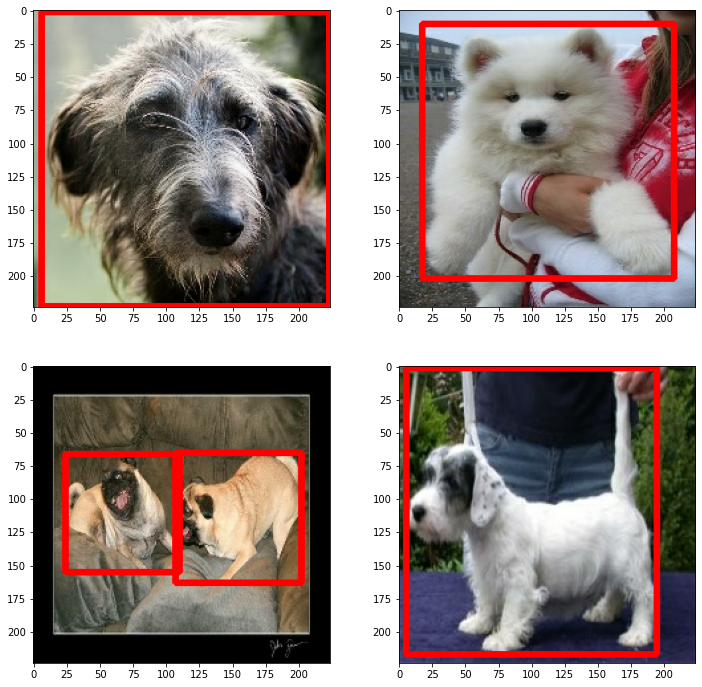

In [75]:
plt.figure(figsize=(12, 12))
for i in range(4):
    image = (images[i].numpy() + 1) / 2
    plt.subplot(2, 2, i + 1)
    image = label_parse(labels[i].numpy(), image)
    plt.imshow(image)